In [23]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [24]:
path = r"C:\Users\Rafa\OneDrive - ypt.or.id\Documents\Data Scientist IDX Partners\FinalProjectIDXPartners/loan_data_2007_2014.csv"
df = pd.read_csv(path)
df.head()

C:\Users\Rafa\AppData\Local\Temp\ipykernel_47252\1246474143.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [26]:
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [27]:
df.shape

(466285, 75)

In [28]:
print(df['loan_status'].unique())

['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']


In [29]:
bad_status = [
    'Charged Off', 
    'Default', 
    'Late (31-120 days)', 
    'Does not meet the credit policy. Status:Charged Off'
]

In [30]:
df['target'] = np.where(df['loan_status'].isin(bad_status), 1, 0)

In [31]:
print("Distribusi Target:")
print(df['target'].value_counts(normalize=True))

Distribusi Target:
target
0    0.890693
1    0.109307
Name: proportion, dtype: float64


In [32]:
df.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
target                   0
Length: 76, dtype: int64

In [33]:
df.duplicated().sum()

np.int64(0)

In [34]:
leakage_cols = [
    'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 
    'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt', 
    'total_pymnt', 'total_pymnt_inv', 'out_prncp', 'out_prncp_inv',
    'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'issue_d'
]

irrelevant_cols = ['Unnamed: 0', 'id', 'member_id', 'url', 'desc', 'title', 'zip_code', 'policy_code', 'application_type']

null_series = df.isnull().mean()
too_many_nulls = null_series[null_series > 0.5].index.tolist()

cols_to_drop = leakage_cols + irrelevant_cols + too_many_nulls + ['loan_status']
df_clean = df.drop(columns=cols_to_drop)

In [35]:
df_clean.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,13648,83.7,9.0,f,0.0,0.0,NaN,NaN,NaN,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,1687,9.4,4.0,f,0.0,0.0,NaN,NaN,NaN,1
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,2956,98.5,10.0,f,0.0,0.0,NaN,NaN,NaN,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,5598,21.0,37.0,f,0.0,0.0,NaN,NaN,NaN,0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,27783,53.9,38.0,f,0.0,0.0,NaN,NaN,NaN,0


In [36]:
df_clean.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'target'],
      dtype='object')

In [37]:
df_clean.shape

(466285, 32)

In [38]:
df_clean.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                     27588
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
pymnt_plan                        0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      340
total_acc                        29
initial_list_status               0
collections_12_mths_ex_med      145
acc_now_delinq              

In [39]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [43]:
categorical_cols = df_clean.select_dtypes(include='object')
numerical_cols = df_clean.select_dtypes(exclude='object')

In [44]:
categorical_cols

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,purpose,addr_state,earliest_cr_line,initial_list_status
0,36 months,B,B2,NaN,10+ years,RENT,Verified,n,credit_card,AZ,Jan-85,f
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,n,car,GA,Apr-99,f
2,36 months,C,C5,NaN,10+ years,RENT,Not Verified,n,small_business,IL,Nov-01,f
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,n,other,CA,Feb-96,f
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,n,other,OR,Jan-96,f
...,...,...,...,...,...,...,...,...,...,...,...,...
466280,60 months,C,C2,Financial Advisor,4 years,MORTGAGE,Source Verified,n,debt_consolidation,TX,Apr-03,w
466281,60 months,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,Verified,n,debt_consolidation,TN,Jun-97,f
466282,60 months,D,D1,patrol,7 years,MORTGAGE,Verified,n,debt_consolidation,OH,Dec-01,f
466283,36 months,A,A4,Server Engineer Lead,3 years,OWN,Verified,n,credit_card,CA,Feb-03,w


In [45]:
numerical_cols

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,0.0,0.0,NaN,NaN,NaN,0
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,0.0,0.0,NaN,NaN,NaN,1
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,0.0,0.0,NaN,NaN,NaN,0
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,0.0,0.0,NaN,NaN,NaN,0
4,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,0.0,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,14.47,432.64,110000.0,19.85,0.0,2.0,18.0,0.0,23208,77.6,36.0,0.0,0.0,0.0,294998.0,29900.0,0
466281,22000,22000,22000.0,19.97,582.50,78000.0,18.45,0.0,5.0,18.0,1.0,18238,46.3,30.0,0.0,0.0,0.0,221830.0,39400.0,1
466282,20700,20700,20700.0,16.99,514.34,46000.0,25.65,0.0,2.0,18.0,0.0,6688,51.1,43.0,0.0,0.0,0.0,73598.0,13100.0,0
466283,2000,2000,2000.0,7.90,62.59,83000.0,5.39,3.0,1.0,21.0,0.0,11404,21.5,27.0,0.0,0.0,0.0,591610.0,53100.0,0


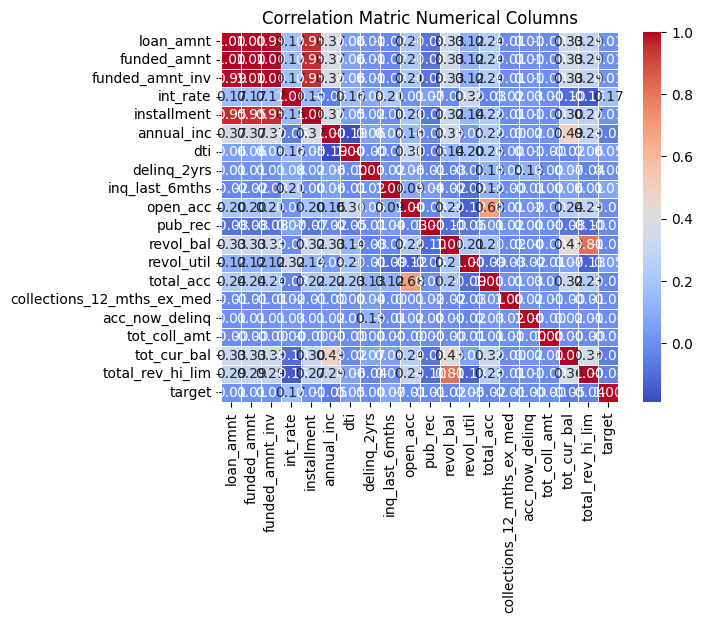

In [58]:
correlation_matrix = numerical_cols.corr()
plt.Figure(figsize=(40,30))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.4)
plt.title('Correlation Matric Numerical Columns')
plt.show()